In [1]:
import numpy as np
import matplotlib.pyplot as plt

fdm_solutions = np.load("FDM_0-50_0.9_2.npy")
pinn_solutions = np.load("pinn_bayes_solutions_0_50_k_0.9_2.npy")
print(fdm_solutions.shape)
print(pinn_solutions.shape)

(1024, 5000)
(401, 5000)


In [2]:
num_points_fdm = 1024
domain_length_fdm = 2.0
x_coords_fdm = np.linspace(-domain_length_fdm, domain_length_fdm, num_points_fdm)
spatial_step_fdm = x_coords_fdm[1] - x_coords_fdm[0]

num_points_pinn = 401
domain_length_pinn = 2.0
x_coords_pinn = np.linspace(-domain_length_pinn, domain_length_pinn, num_points_pinn)
spatial_step_pinn = x_coords_pinn[1] - x_coords_pinn[0]

pinn_means = np.sum(x_coords_pinn[:, None] * pinn_solutions * spatial_step_pinn, axis=0)
fdm_means = np.sum(x_coords_fdm[:, None] * fdm_solutions * spatial_step_fdm, axis=0)
print(pinn_means.shape)
print(fdm_means.shape)


(5000,)
(5000,)


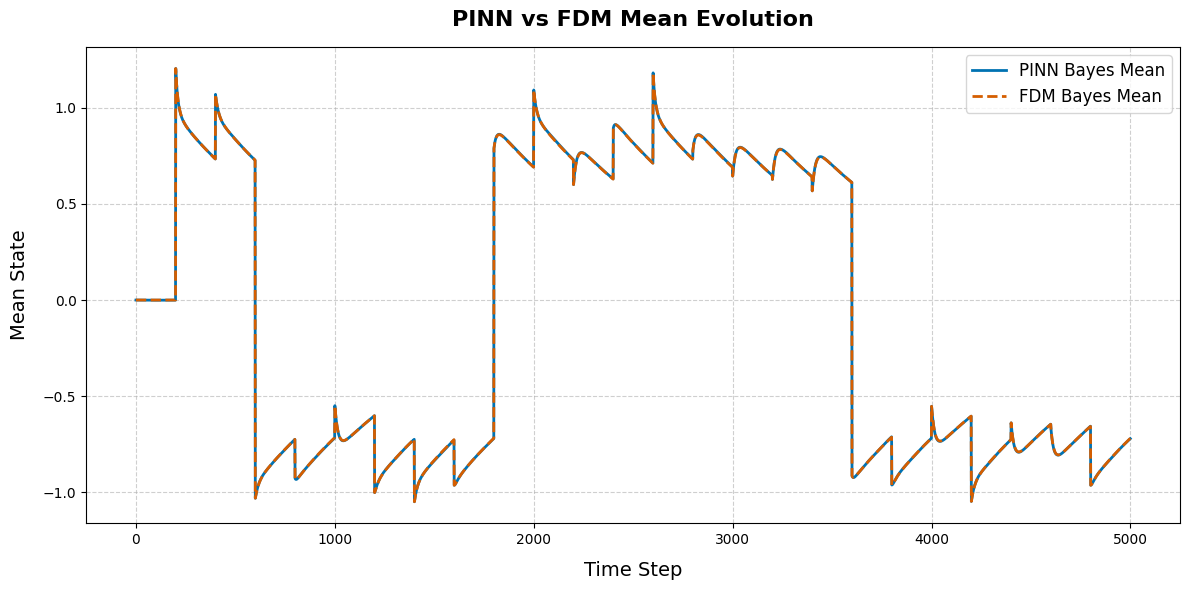

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(pinn_means, label="PINN Bayes Mean", color="#0072B2", linewidth=2)
plt.plot(fdm_means, label="FDM Bayes Mean", color="#D55E00", linewidth=2, linestyle='--')
plt.xlabel("Time Step", fontsize=14, labelpad=10)
plt.ylabel("Mean State", fontsize=14, labelpad=10)
plt.title("PINN vs FDM Mean Evolution", fontsize=16, fontweight="bold", pad=15)
plt.legend(fontsize=12, loc="upper right", frameon=True)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("pinnbayes_vs_fdmbayes_means_k_0.5.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
mae = np.mean(np.abs(pinn_means - fdm_means))
print(f"Mean Absolute Error: {mae:.6f}")

Mean Absolute Error: 0.001049
